In [ ]:
import numpy as np
import tensorflow as tf

# Define the 5×5 input matrix
input_matrix = np.array([[1, 2, 3, 4, 5],
                         [6, 7, 8, 9, 10],
                         [11, 12, 13, 14, 15],
                         [16, 17, 18, 19, 20],
                         [21, 22, 23, 24, 25]], dtype=np.float32)

# Reshape to match TensorFlow's expected input format (batch_size, height, width, channels)
input_tensor = tf.constant(input_matrix.reshape(1, 5, 5, 1))

# Define the 3×3 kernel
kernel = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]], dtype=np.float32)

# Reshape kernel to match TensorFlow's expected format (height, width, input_channels, output_channels)
kernel_tensor = tf.constant(kernel.reshape(3, 3, 1, 1))

# Function to perform convolution
def perform_convolution(input_tensor, kernel_tensor, stride, padding):
    return tf.nn.conv2d(input_tensor, kernel_tensor, strides=[1, stride, stride, 1], padding=padding).numpy().squeeze()

# Perform convolution with different stride and padding configurations
results = {
    "Stride = 1, Padding = 'VALID'": perform_convolution(input_tensor, kernel_tensor, stride=1, padding='VALID'),
    "Stride = 1, Padding = 'SAME'": perform_convolution(input_tensor, kernel_tensor, stride=1, padding='SAME'),
    "Stride = 2, Padding = 'VALID'": perform_convolution(input_tensor, kernel_tensor, stride=2, padding='VALID'),
    "Stride = 2, Padding = 'SAME'": perform_convolution(input_tensor, kernel_tensor, stride=2, padding='SAME')
}

# Print the output feature maps
for config, feature_map in results.items():
    print(f"\n{config}:\n{feature_map}")


Stride = 1, Padding = 'VALID':
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Stride = 1, Padding = 'SAME':
[[  4.   3.   2.   1.  -6.]
 [ -5.   0.   0.   0. -11.]
 [-10.   0.   0.   0. -16.]
 [-15.   0.   0.   0. -21.]
 [-46. -27. -28. -29. -56.]]

Stride = 2, Padding = 'VALID':
[[0. 0.]
 [0. 0.]]

Stride = 2, Padding = 'SAME':
[[  4.   2.  -6.]
 [-10.   0. -16.]
 [-46. -28. -56.]]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.5 MB/s eta 0:00:00
Original Image:


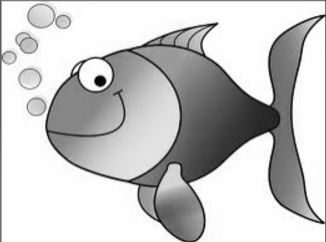


Edge Detection - Sobel X:


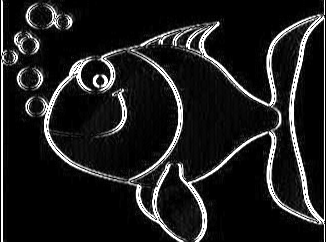


Edge Detection - Sobel Y:


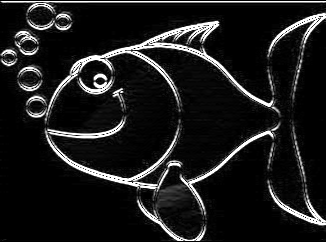

In [4]:
import cv2
import numpy as np
import requests # Import the requests library

# Load a grayscale image
# cv2.imread cannot read directly from a URL.
# We need to download the image data first.
# image_url = ''
from PIL import Image
# This line will now work after uploading 'fish.jpeg' to Colab's session storage
image_url = Image.open('fish.jpeg')
try:
    # The rest of your code to process the image...
    # Download the image - This part is now incorrect as image_url is a PIL Image object, not a URL string
    # response = requests.get(image_url) # This line will cause an error now
    # response.raise_for_status() # This line will cause an error now

    # Read the image data into a numpy array
    # image_array = np.frombuffer(response.content, dtype=np.uint8) # This line will cause an error now

    # Decode the image using OpenCV
    # image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE) # This line will cause an error now

    # --- Corrected processing after loading with PIL ---
    # Convert the PIL Image object to a NumPy array for OpenCV
    image_array = np.array(image_url)

    # Ensure the image is grayscale if needed, although the Sobel filter expects single channel
    # If the PIL image is RGB/RGBA, convert it
    if len(image_array.shape) == 3:
        image = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
    else:
        image = image_array # Assume it's already grayscale

    # Check if the image was loaded successfully
    if image is None:
        print("Error: Could not load image from file.")
    else:
        # Apply Sobel filter for edge detection
        sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Edge detection in x-direction
        sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Edge detection in y-direction

        # Convert to absolute scale and normalize for visualization
        sobel_x = cv2.convertScaleAbs(sobel_x)
        sobel_y = cv2.convertScaleAbs(sobel_y)

        # Display images (Note: cv2.imshow won't work directly in Colab, use cv2_imshow from google.colab.patches)
        # For Colab, you need to install and import cv2_imshow
        !pip install google-colab
        from google.colab.patches import cv2_imshow

        print("Original Image:")
        cv2_imshow(image)
        print("\nEdge Detection - Sobel X:")
        cv2_imshow(sobel_x)
        print("\nEdge Detection - Sobel Y:")
        cv2_imshow(sobel_y)

        # cv2.waitKey(0) # Not needed with cv2_imshow
        # cv2.destroyAllWindows() # Not needed with cv2_imshow

except FileNotFoundError:
    print("Error: The file 'fish.jpeg' was not found. Make sure it is uploaded to Colab's session storage.")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
import numpy as np
import tensorflow as tf

# Create a random 4×4 matrix
# Remove the dtype argument as randint generates integers
# input_matrix = np.random.randint(0, 100, (1, 4, 4, 1))

# Create a random 4x4 matrix with float32 dtype
input_matrix = np.random.randint(0, 100, (1, 4, 4, 1)).astype(np.float32)


# Max Pooling (2×2)
max_pooled = tf.nn.max_pool2d(input_matrix, ksize=2, strides=2, padding='VALID')

# Average Pooling (2×2)
avg_pooled = tf.nn.avg_pool2d(input_matrix, ksize=2, strides=2, padding='VALID')

# Print results
print("Original Matrix:\n", input_matrix.squeeze())
print("\nMax Pooled Matrix:\n", max_pooled.numpy().squeeze())
print("\nAverage Pooled Matrix:\n", avg_pooled.numpy().squeeze())

Original Matrix:
 [[71.  8. 88.  7.]
 [29. 92.  0. 39.]
 [41. 72. 51. 12.]
 [65.  1. 25. 14.]]

Max Pooled Matrix:
 [[92. 88.]
 [72. 51.]]

Average Pooled Matrix:
 [[50.   33.5 ]
 [44.75 25.5 ]]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Numeric features
y = iris.target  # Labels

# Min-Max Normalization
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)
print("Min-Max Normalized Data:\n", X_minmax[:5])

# Z-score Standardization
scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)
print("\nZ-score Standardized Data:\n", X_standard[:5])

# Visualize distributions using histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(X_minmax.flatten(), bins=20, color='blue', alpha=0.7)
plt.title("Min-Max Normalized Distribution")

plt.subplot(1, 2, 2)
plt.hist(X_standard.flatten(), bins=20, color='green', alpha=0.7)
plt.title("Z-score Standardized Distribution")
plt.show()

# Split data for model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression without preprocessing
model_original = LogisticRegression()
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Train Logistic Regression with Min-Max Normalization
X_train_minmax, X_test_minmax = train_test_split(X_minmax, test_size=0.2, random_state=42)
model_minmax = LogisticRegression()
model_minmax.fit(X_train_minmax, y_train)
y_pred_minmax = model_minmax.predict(X_test_minmax)
accuracy_minmax = accuracy_score(y_test, y_pred_minmax)

# Train Logistic Regression with Z-score Standardization
X_train_standard, X_test_standard = train_test_split(X_standard, test_size=0.2, random_state=42)
model_standard = LogisticRegression()
model_standard.fit(X_train_standard, y_train)
y_pred_standard = model_standard.predict(X_test_standard)
accuracy_standard = accuracy_score(y_test, y_pred_standard)

# Print accuracy results
print(f"\nLogistic Regression Accuracy (Original Data): {accuracy_original:.4f}")
print(f"Logistic Regression Accuracy (Min-Max Normalized Data): {accuracy_minmax:.4f}")
print(f"Logistic Regression Accuracy (Z-score Standardized Data): {accuracy_standard:.4f}")

# **When to use Normalization vs. Standardization?**
"""
Normalization (Min-Max Scaling):
- Used when feature ranges vary significantly.
- Useful for algorithms like KNN, Neural Networks, where input data should be within a specific range (e.g., [0,1]).

Standardization (Z-score Scaling):
- Works well when data follows a Gaussian distribution.
- Recommended for models sensitive to outliers (e.g., logistic regression, SVM).
"""